# Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# pwd

# Loading Data

In [4]:
df = pd.read_csv("f:\\Learning\\TF_2_Notebooks_and_Data\\Deep learning self work\\DATA\\Frozen_Dessert_Production.csv",parse_dates=True,index_col='DATE')

In [5]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [6]:
df.columns=['Production']

In [7]:
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [8]:
len(df)

573

<Axes: xlabel='DATE'>

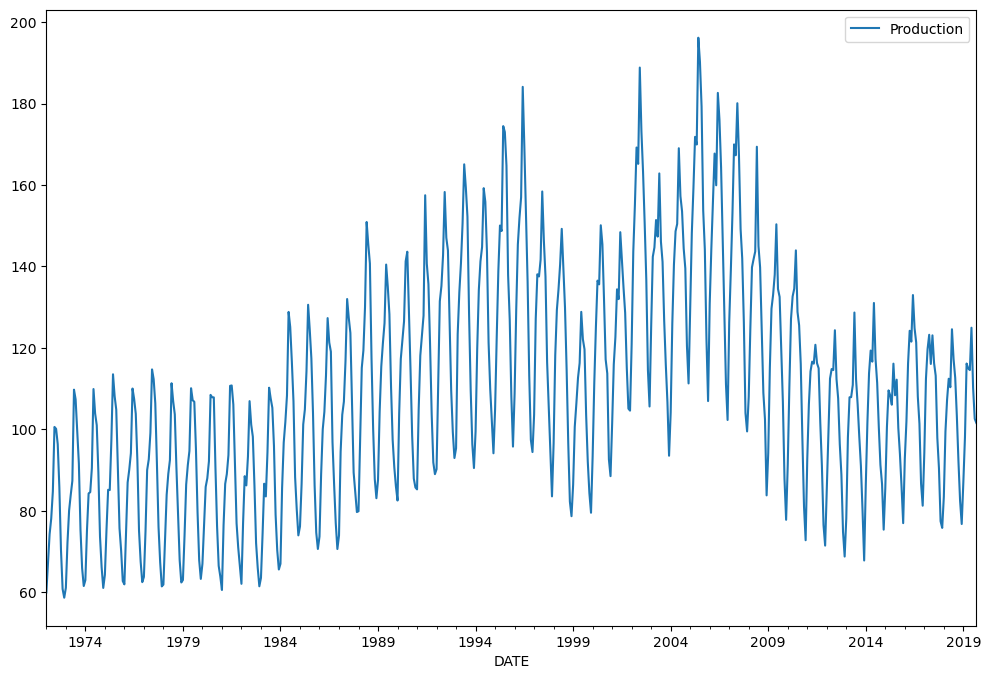

In [9]:
df.plot(figsize=(12,8))

# Train Test Split

In [10]:
test_size = 24 
test_ind = len(df)-test_size

In [11]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [12]:
train

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2017-05-01,116.0635
2017-06-01,123.0870
2017-07-01,116.2639


In [13]:
test

,Production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


# Preprocessing Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [16]:
scaled_train = scaler.transform(train)

In [17]:
scaled_test = scaler.transform(test)

# Creating Generator

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
length = 20
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=1)

In [20]:
X,y = generator[0]

In [21]:
# len(X[0])

In [22]:
# y

# Creating Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [24]:
n_features = 1

In [25]:
model = Sequential()

model.add(LSTM(150,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [29]:
validation_gen = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [30]:
model.fit(generator,epochs=20,validation_data=validation_gen,callbacks=[early_stop])

Epoch 1/20
529/529 [==============================] - 25s 19ms/step - loss: 0.0149 - val_loss: 0.0089
Epoch 2/20
529/529 [==============================] - 9s 18ms/step - loss: 0.0048 - val_loss: 0.0022
Epoch 3/20
529/529 [==============================] - 9s 16ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 4/20
529/529 [==============================] - 9s 17ms/step - loss: 0.0034 - val_loss: 0.0034


In [31]:
losses = pd.DataFrame(model.history.history)

In [32]:
losses

,loss,val_loss
0,0.014874,0.008947
1,0.004835,0.002205
2,0.004064,0.004889
3,0.003389,0.003385


<Axes: >

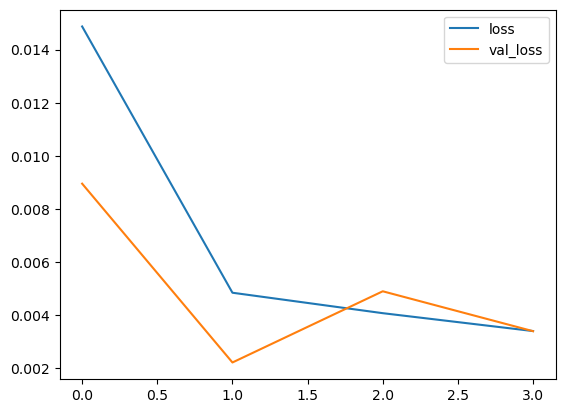

In [33]:
losses.plot()

In [34]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


In [35]:
true_predictions = scaler.inverse_transform(test_predictions)

In [36]:
true_predictions

array([[ 87.65611812],
       [ 81.62032986],
       [ 81.3924107 ],
       [ 85.88493533],
       [ 92.65644258],
       [ 99.53430308],
       [104.65415253],
       [106.92244695],
       [105.49331503],
       [100.15921403],
       [ 91.32167659],
       [ 80.82764542],
       [ 71.77178585],
       [ 66.89833655],
       [ 67.05052343],
       [ 71.1788237 ],
       [ 77.10128761],
       [ 82.99586917],
       [ 87.1840221 ],
       [ 88.71101164],
       [ 86.78841961],
       [ 81.34278519],
       [ 73.06795673],
       [ 63.7084119 ]])

In [37]:
test['Prediction'] = true_predictions

C:\Users\abc\AppData\Local\Temp\ipykernel_11600\168099314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = true_predictions


In [38]:
test.head()

,Production,Prediction
DATE,,
2017-10-01,90.4732,87.656118
2017-11-01,77.4378,81.620330
2017-12-01,75.8118,81.392411
2018-01-01,83.4343,85.884935
2018-02-01,99.4899,92.656443


<Axes: xlabel='DATE'>

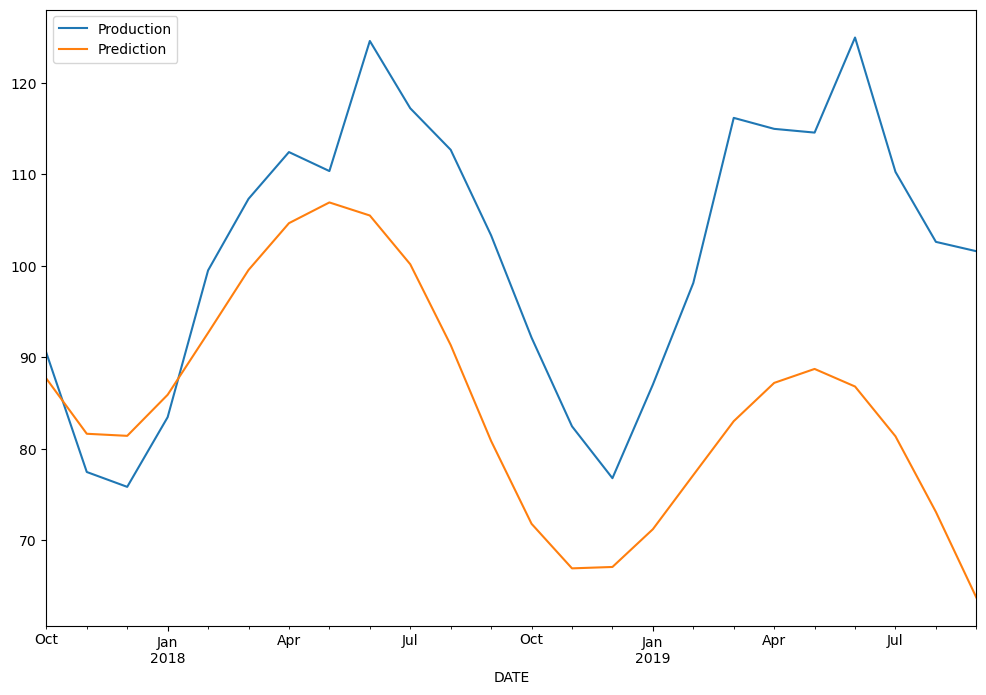

In [39]:
test.plot(figsize=(12,8))

## Fine Tuning The Model

In [40]:
model_1 = Sequential()

model_1.add(LSTM(150,activation='relu',input_shape=(length,n_features)))
model_1.add(Dense(1))

model_1.compile(optimizer='adam',loss='mse')

In [41]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               91200     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_1.fit(generator,epochs=20,validation_data=validation_gen,callbacks=[early_stop])

Epoch 1/20
529/529 [==============================] - 10s 14ms/step - loss: 0.0236 - val_loss: 0.0028
Epoch 2/20
529/529 [==============================] - 8s 15ms/step - loss: 0.0069 - val_loss: 0.0026
Epoch 3/20
529/529 [==============================] - 9s 16ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 4/20
529/529 [==============================] - 8s 16ms/step - loss: 0.0035 - val_loss: 0.0029


In [43]:
losses_1 = pd.DataFrame(model_1.history.history)

<Axes: >

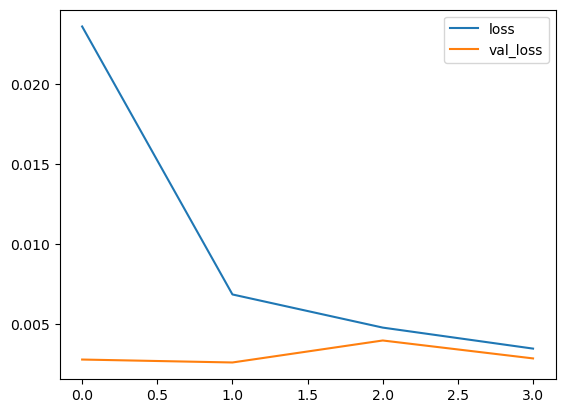

In [44]:
losses_1.plot()

In [45]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model_1.predict(current_batch)[0]
    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 37ms/step


In [46]:
true_predictions = scaler.inverse_transform(test_predictions)

In [47]:
test['Prediction'] = true_predictions

C:\Users\abc\AppData\Local\Temp\ipykernel_11600\168099314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = true_predictions


In [48]:
test.head()

,Production,Prediction
DATE,,
2017-10-01,90.4732,90.321406
2017-11-01,77.4378,82.644366
2017-12-01,75.8118,82.555922
2018-01-01,83.4343,92.215282
2018-02-01,99.4899,103.918167


<Axes: xlabel='DATE'>

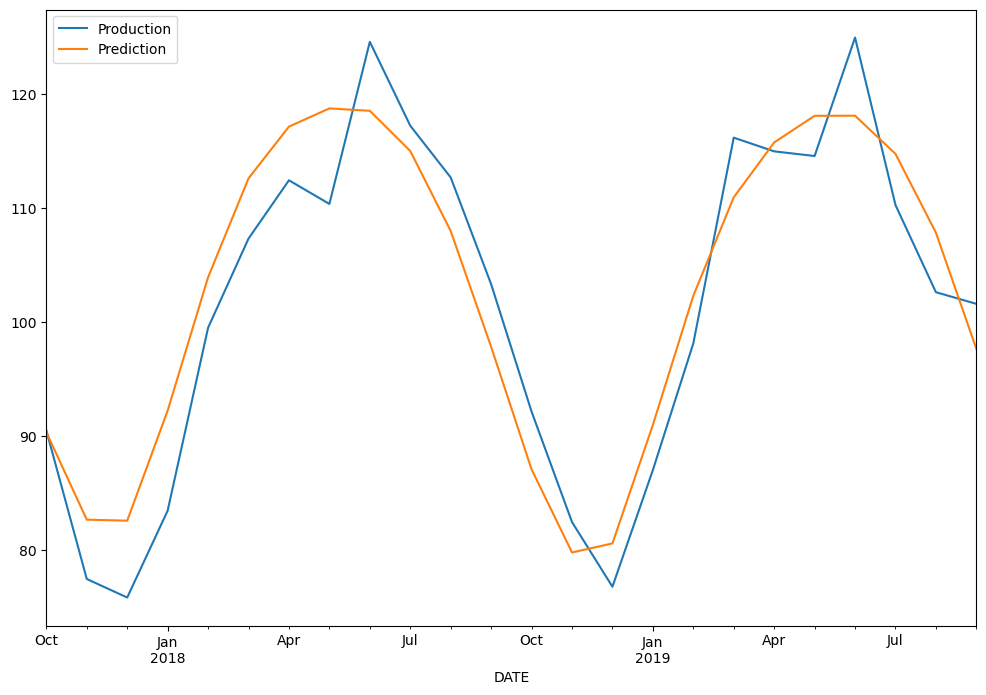

In [49]:
test.plot(figsize=(12,8))

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
np.sqrt(mean_squared_error(test['Production'],test['Prediction']))

5.0605119729211125

# Forecasting

In [52]:
full_scaler = MinMaxScaler()
scaled_df = full_scaler.fit_transform(df)

In [53]:
length = 24
generator = TimeseriesGenerator(scaled_df,scaled_df,length=length,
                                batch_size=1)

In [54]:
model = Sequential()

model.add(LSTM(150,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [55]:
model.fit(generator,epochs=5)

Epoch 1/5
549/549 [==============================] - 11s 15ms/step - loss: 0.0313
Epoch 2/5
549/549 [==============================] - 8s 14ms/step - loss: 0.0152
Epoch 3/5
549/549 [==============================] - 8s 15ms/step - loss: 0.0056
Epoch 4/5
549/549 [==============================] - 9s 16ms/step - loss: 0.0038
Epoch 5/5
549/549 [==============================] - 9s 17ms/step - loss: 0.0034


In [56]:
forecast = []
period = 24
first_eval_batch = scaled_df[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(period):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 38ms/step


In [57]:
forecast = full_scaler.inverse_transform(forecast)

In [58]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [59]:
forecast_ind = pd.date_range(start='2019-10-01',periods=period,freq='MS')

In [60]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_ind,columns=['Forecast'])

In [61]:
forecast_df

,Forecast
2019-10-01,82.802836
2019-11-01,72.632490
2019-12-01,69.317308
2020-01-01,74.725111
2020-02-01,86.323037
2020-03-01,95.569971
2020-04-01,102.414247
2020-05-01,107.580636
2020-06-01,111.596511
2020-07-01,110.189645


<Axes: xlabel='DATE'>

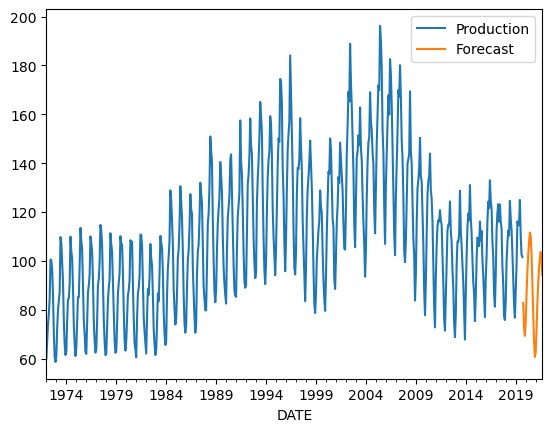

In [62]:
ax = df.plot()
forecast_df.plot(ax=ax)

<Axes: >

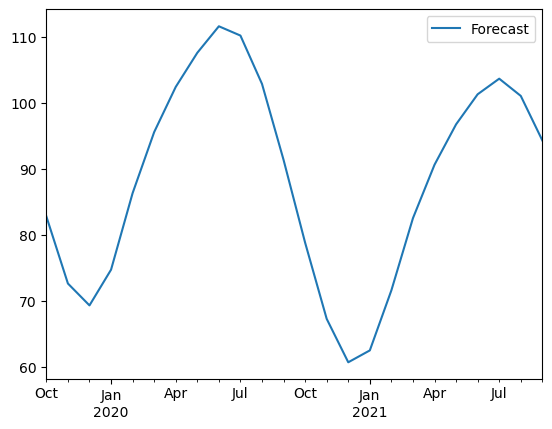

In [63]:
forecast_df.plot()